In [1]:
import mlxtend #not in tensorfow environment

ModuleNotFoundError: No module named 'mlxtend'

In [2]:
import pandas as pd
import numpy as np
import scipy.stats  as stats
import math
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

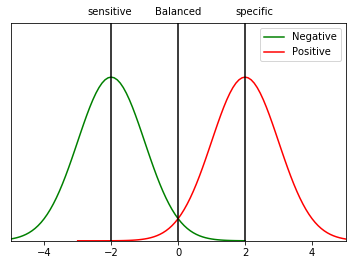

In [7]:
mu1 = -2
mu2 = 2
variance = 1
sigma = math.sqrt(variance)
x1 = np.linspace(mu1 - 5 * sigma, mu1 + 4 * sigma,  100)
x2 = np.linspace(mu2 - 5 * sigma, mu2 + 4 * sigma,  100)
plt.plot(x1,  stats.norm.pdf(x1, mu1, sigma)/1, color = 'green')
plt.plot(x2,  stats.norm.pdf(x2, mu2, sigma)/1, color = 'red')
plt.axvline(x=-2, color = 'black')
plt.axvline(x=0, color = 'black')
plt.axvline(x=+2, color = 'black')
plt.text(-2.7, 0.55, "sensitive")
plt.text(-0.7, 0.55, "Balanced")
plt.text(1.7, 0.55, "specific")
plt.ylim([0,0.53])
plt.xlim([-5,5])
plt.legend(['Negative', 'Positive'])
plt.yticks([])
plt.show()



### Binary clssification

In [8]:
## reading the data frame
df = pd.read_csv(r'c:\ai\data\wcbreast_wdbc.csv', na_values=['?','NA'])
display(df[0:5])

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
## we neeed to apply a zscore function  for the columns
## i.e mean =0 and std = 1
from scipy.stats import zscore

x_columns = df.columns.drop('diagnosis').drop('id')
for col in x_columns:
    df[col] = zscore(df[col])

#convert to numpy _ regressio
x = df[x_columns].values
y = df['diagnosis'].map({'M': 1,'B':0})   #binary classificatio M is 1 and B is 0


In [10]:
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [11]:
df.head(5)

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [34]:
##afret preorocessing our data now e create the confusion matrix and
## RCC curve functions

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
from sklearn.metrics import auc, roc_curve
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


In [16]:
## ROC example
## cassification of a neural network
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#split into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim = x.shape[1],  activation='relu', kernel_initializer='random_normal'))
model.add(Dense(50, activation = 'relu', kernel_initializer='random_normal'))
model.add(Dense(25, activation = 'relu', kernel_initializer='random_normal'))
model.add(Dense(1, activation = 'linear', kernel_initializer='random_normal'))
model.compile(loss = 'binary_crossentropy',
             optimizer = tensorflow.keras.optimizers.Adam(),
             metrics =['accuracy'])

monitor = EarlyStopping(monitor = 'val_loss', min_delta=1e-3,
                       patience=5, verbose=1, mode='auto')
model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks=[monitor], verbose=2, epochs=100)

Train on 426 samples, validate on 143 samples
Epoch 1/100
 - 3s - loss: 1.5775 - acc: 0.6291 - val_loss: 0.9636 - val_acc: 0.6224
Epoch 2/100
 - 0s - loss: 0.7807 - acc: 0.6338 - val_loss: 0.5341 - val_acc: 0.6783
Epoch 3/100
 - 0s - loss: 0.4340 - acc: 0.7653 - val_loss: 0.2673 - val_acc: 0.8671
Epoch 4/100
 - 0s - loss: 0.2750 - acc: 0.9061 - val_loss: 0.2621 - val_acc: 0.9301
Epoch 5/100
 - 0s - loss: 0.1920 - acc: 0.9296 - val_loss: 0.1255 - val_acc: 0.9580
Epoch 6/100
 - 0s - loss: 0.1411 - acc: 0.9507 - val_loss: 0.0804 - val_acc: 0.9580
Epoch 7/100
 - 0s - loss: 0.1166 - acc: 0.9601 - val_loss: 0.0647 - val_acc: 0.9790
Epoch 8/100
 - 0s - loss: 0.1011 - acc: 0.9718 - val_loss: 0.0600 - val_acc: 0.9860
Epoch 9/100
 - 0s - loss: 0.0907 - acc: 0.9742 - val_loss: 0.0593 - val_acc: 0.9790
Epoch 10/100
 - 0s - loss: 0.0834 - acc: 0.9836 - val_loss: 0.0618 - val_acc: 0.9790
Epoch 11/100
 - 0s - loss: 0.0780 - acc: 0.9859 - val_loss: 0.0671 - val_acc: 0.9720
Epoch 12/100
 - 0s - loss: 0

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_9 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_10 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 26        
Total params: 9,451
Trainable params: 9,451
Non-trainable params: 0
_________________________________________________________________
None


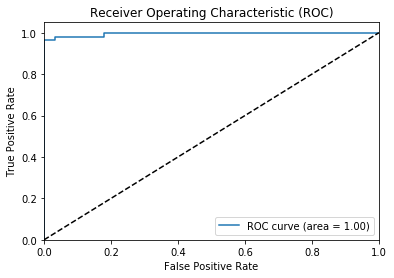

In [20]:
pred = model.predict(x_test)
plot_roc(pred, y_test)

In [4]:
##MUlticlassification data
df = pd.read_csv(r'c:\ai\data\jh-simple-dataset.csv', na_values=['NA', '?'])
from scipy.stats import zscore


In [5]:
#Geneate dummies fo job
df = pd.concat([df, pd.get_dummies(df['job'], prefix = "job")],  axis=1)
df.drop('job',  axis=1, inplace = True)

#generate dummies for area
df = pd.concat([df, pd.get_dummies(df['area'], prefix = "area")],  axis=1)
df.drop('area',  axis=1, inplace = True)

#msissing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

#standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['subscriptions'] = zscore(df['subscriptions'])

#convert to numpy classificatio
x_columns = df.columns.drop('product').drop('id')
x = df[x_columns].values
dummies = pd.get_dummies(df['product'])
products = dummies.columns
y = dummies.values

In [6]:
#confirming the jh -dataset
display(df[0:5])

,id,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,...,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz,area_a,area_b,area_c,area_d
0,1,-0.607550,-0.664918,-0.208449,9.017895,-0.215764,11.738935,0.854321,0.885827,0.492126,...,0,0,0,0,1,0,0,0,1,0
1,2,0.338053,-0.207748,0.839031,7.766643,0.196869,6.805396,1.394432,0.874016,0.342520,...,0,0,0,0,0,0,0,0,1,0
2,3,-0.184205,1.127906,-0.208449,3.632069,-0.714362,13.671772,-0.495957,0.944882,0.724409,...,0,0,0,0,0,0,0,0,1,0
3,4,-0.526467,-0.440815,-0.208449,5.372942,-0.542432,4.333286,1.124377,0.889764,0.444882,...,0,0,0,0,0,0,0,0,1,0
4,5,-2.851675,1.638861,1.886511,3.822477,-0.473660,5.967121,-2.116291,0.744094,0.661417,...,0,0,0,0,0,0,0,0,0,1


In [10]:
## classification on neural network
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu',kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(y.shape[1],activation='softmax',kernel_initializer='random_normal'))
model.compile(loss='categorical_crossentropy', 
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto')
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)


Train on 1500 samples, validate on 500 samples
Epoch 1/1000
 - 1s - loss: 1.5229 - acc: 0.4113 - val_loss: 1.1464 - val_acc: 0.4980
Epoch 2/1000
 - 0s - loss: 1.1271 - acc: 0.4780 - val_loss: 1.0723 - val_acc: 0.4980
Epoch 3/1000
 - 0s - loss: 1.0445 - acc: 0.5387 - val_loss: 0.9875 - val_acc: 0.5960
Epoch 4/1000
 - 0s - loss: 0.9027 - acc: 0.6380 - val_loss: 0.8943 - val_acc: 0.6240
Epoch 5/1000
 - 0s - loss: 0.8141 - acc: 0.6807 - val_loss: 0.8234 - val_acc: 0.6820
Epoch 6/1000
 - 0s - loss: 0.7895 - acc: 0.6867 - val_loss: 0.8258 - val_acc: 0.6540
Epoch 7/1000
 - 0s - loss: 0.7642 - acc: 0.6920 - val_loss: 0.7944 - val_acc: 0.6900
Epoch 8/1000
 - 0s - loss: 0.7390 - acc: 0.6907 - val_loss: 0.7843 - val_acc: 0.7000
Epoch 9/1000
 - 0s - loss: 0.7314 - acc: 0.6973 - val_loss: 0.7756 - val_acc: 0.6820
Epoch 10/1000
 - 0s - loss: 0.7190 - acc: 0.6920 - val_loss: 0.8270 - val_acc: 0.6460
Epoch 11/1000
 - 0s - loss: 0.7143 - acc: 0.6960 - val_loss: 0.7592 - val_acc: 0.6840
Epoch 12/1000
 -

In [8]:
## lets see how this models performs through plotting.Lets visualize the progress of the model through stats of the epoch
history.history.keys() history.
history.epoch


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [11]:
#create a dataframe
hist = pd.DataFrame(history.history)  history.
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_acc,loss,acc,epoch
35,0.728045,0.700,0.597932,0.740667,35
36,0.729761,0.698,0.597104,0.735333,36
37,0.727468,0.708,0.593311,0.744667,37
38,0.726376,0.706,0.602076,0.743333,38
39,0.745720,0.688,0.615438,0.740667,39


In [14]:
#lets create a function to plot this functions
def plot_model(history): 
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.plot(hist['epoch'], hist['acc'], 'bo', label = 'Training Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'], 'b', label = 'Validation  Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.title('Training and Validation accuracy')
    plt.legend()
    
    plt.figure()
    plt.plot(hist['epoch'], hist['loss'], 'bo', label = 'Training Loss')
    plt.plot(hist['epoch'], hist['val_loss'], 'b', label = 'Validation  Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation loss')
    plt.legend()
    plt.show()


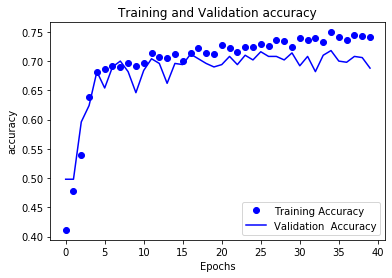

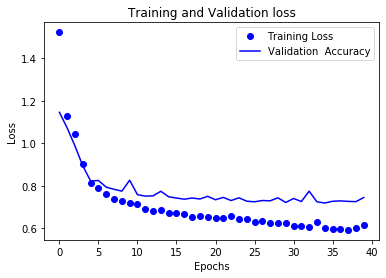

In [15]:
plot_model(history)

In [17]:
#evaluating the model
loss, acc = model.evaluate(x_test,y_test)
print('The accuracy of this model is {:5.2f}'.format(acc))

500/500 [==============================] - 0s 40us/step
The accuracy of this model is  0.69


In [18]:
## calculate the acuracy of this model
pred = model.predict(x_test)
pred = np.argmax(pred,  axis=1) #raw probabilities to chose class(highest probability)

In [23]:
y_true = np.argmax(y_test,  axis=1)

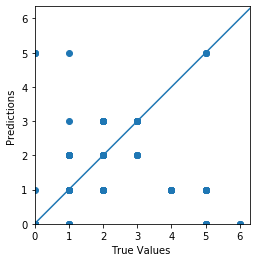

In [24]:
plt.scatter(y_true, pred)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


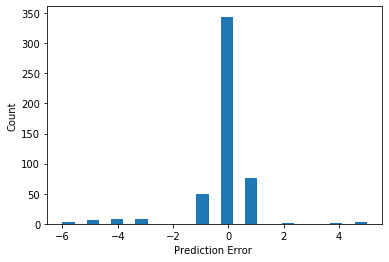

In [26]:
## Error distribution
error = pred - y_true
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error ")
_ = plt.ylabel("Count")
#the model is not gaussian meanng the model is not working well


In [27]:
from sklearn import metrics

y_compare = np.argmax(y_test, axis =1)
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))

Accuracy score: 0.696


In [28]:
y.shape

(2000, 7)

Confusion matrix, without normalization
[[ 21   1   0   0   0   0   0]
 [  4 195  50   0   0   0   0]
 [  0  56 129   2   0   0   0]
 [  0   0  11   3   0   0   0]
 [  0   8   0   0   0   0   0]
 [ 10   7   0   0   0   0   0]
 [  3   0   0   0   0   0   0]]
Normalized confusion matrix
[[0.95 0.05 0.   0.   0.   0.   0.  ]
 [0.02 0.78 0.2  0.   0.   0.   0.  ]
 [0.   0.3  0.69 0.01 0.   0.   0.  ]
 [0.   0.   0.79 0.21 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.59 0.41 0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.  ]]


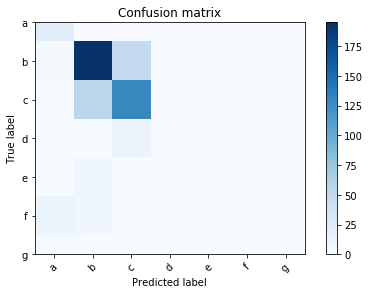

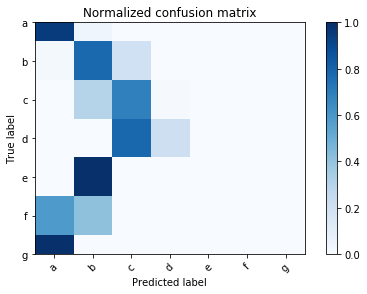

In [35]:
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_compare, pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, products)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, products, title='Normalized confusion matrix')

plt.show()

In [30]:
cm.shape

(7, 7)

## L1 and L2 reguralization

In [38]:
from sklearn.linear_model import LassoCV
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split 

df = pd.read_csv(r"c:\ai\data\auto-mpg.csv", na_values=['NA', '?'])

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
names = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']
x = df[names].values
y = df['mpg'].values # regression

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=45)

In [39]:
# Simple function to evaluate the coefficients of a regression
%matplotlib inline    
from IPython.display import display, HTML    

def report_coef(names,coef,intercept):
    r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, index = names )
    r = r.sort_values(by=['coef'])
    display(r)
    print(f"Intercept: {intercept}")
    r['coef'].plot(kind='barh', color=r['positive'].map({True: 'b', False: 'r'}))

Final score (RMSE): 3.0019345985860775


,coef,positive
cylinders,-0.427721,False
weight,-0.007255,False
horsepower,-0.005491,False
displacement,0.020166,True
acceleration,0.138575,True
year,0.783047,True
origin,1.003762,True


Intercept: -19.101231042200084


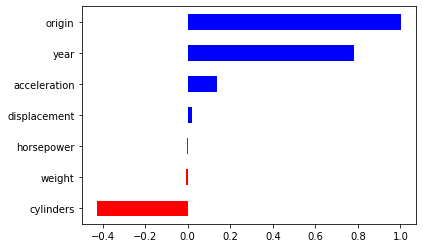

In [40]:
import sklearn

# Create linear regression
regressor = sklearn.linear_model.LinearRegression()

# Fit/train linear regression
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

Final score (RMSE): 3.0604021904033303


,coef,positive
cylinders,-0.012995,False
weight,-0.007328,False
horsepower,-0.002715,False
displacement,0.011601,True
acceleration,0.114391,True
origin,0.708222,True
year,0.777480,True


Intercept: -18.50667798238323


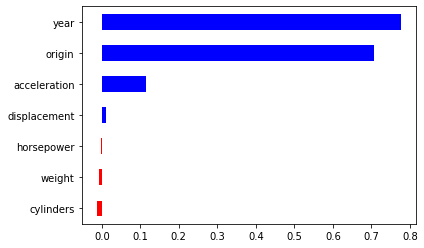

In [41]:
import sklearn
from sklearn.linear_model import Lasso

# Create linear regression
regressor = Lasso(random_state=0,alpha=0.1)

# Fit/train LASSO
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)


(1e-08, 100000000.0)

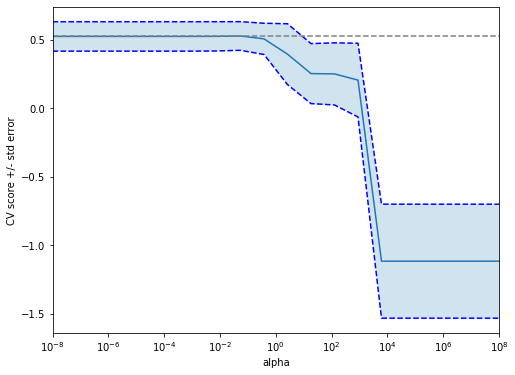

In [42]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lasso = Lasso(random_state =42)
alphas = np.logspace(-8, 8,  20)

scores = list()
scores_std = list()

n_folds = 3
for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_val_score(lasso, x, y, cv = n_folds, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))
    
scores,  scores_std = np.array(scores), np.array(scores_std)
plt.figure().set_size_inches(8,6)
plt.semilogx(alphas,  scores)

#plot the error llines showing +/- std. errors for this scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas,  scores - std_error, 'b--')

plt.fill_between(alphas,  scores + std_error, scores - std_error, alpha = 0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--',  color='.5')
plt.xlim([alphas[0], alphas[-1]])

## L2 (Ridge) Regularization
#### This deals with dense data and when you just want low weights values

Final score (RMSE): {score}


,coef,positive
cylinders,-0.421393,False
weight,-0.007257,False
horsepower,-0.005385,False
displacement,0.020006,True
acceleration,0.138470,True
year,0.782889,True
origin,0.994621,True


Intercept: -19.07980074425464


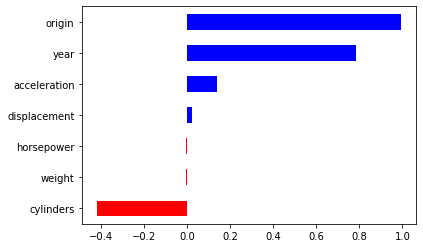

In [43]:
import sklearn
from sklearn.linear_model import Ridge

#create linear regression
regressor = Ridge(alpha=1)
#Fit and train rifge
regressor.fit(x_train, y_train)
#predict
pred = regressor.predict(x_test)

#measure RMSE error. RMSE is common for regression
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("Final score (RMSE): {score}")

report_coef(
            names,
            regressor.coef_,
            regressor.intercept_)

### Elastic net

Final score (RMSE): 3.0450899960775026


,coef,positive
cylinders,-0.274010,False
weight,-0.007303,False
horsepower,-0.003231,False
displacement,0.016194,True
acceleration,0.132348,True
year,0.777482,True
origin,0.782781,True


Intercept: -18.38935569042974


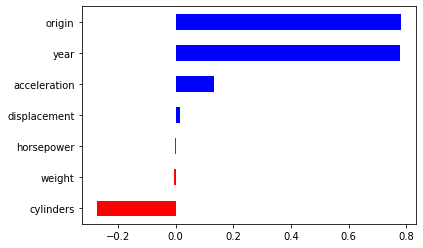

In [45]:
import sklearn
from sklearn.linear_model import ElasticNet

# Create linear regression
regressor = ElasticNet(alpha=0.1, l1_ratio=0.1)

# Fit/train LASSO
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

In [46]:
## USe of drop out adnd cross validation
import pandas as pd
from scipy.stats import zscore

# Read the data set
df = pd.read_csv(
    r"c:\ai\data\jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('product').drop('id')
x = df[x_columns].values
dummies = pd.get_dummies(df['product']) # Classification
products = dummies.columns
y = dummies.values

In [48]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

#cross validation
kf = KFold(5, shuffle=True, random_state=42)

oos_y = []
oos_pred = []
fold = 0

for train, test in kf.split(x):
    fold+=1
    print(f"Fold #{fold}")
          
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
          
    #kernel_reularizer= regulariers.l2(0.01)
    model = Sequential()
    model.add(Dense(50, input_dim = x.shape[1],  activation='relu')) # Hidden layer 1
    model.add(Dropout(0.5))
    model.add(Dense(25, activation='relu', activity_regularizer=regularizers.l1(1e-4))) ## Hidden layers 2   
    #dropout layer is not put ater the inal layer
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')
          
    model.fit(x_train, y_train, validation_data=(x_test, y_test), verbose=0, epochs=100)
          
    pred = model.predict(x_test)
          
    oos_y.append(y_test)
    pred = np.argmax(pred,  axis=1) #raw probabilites to chose class (high probabilty)
    oos_pred.append(pred)
          
    #measure this folders accuracy
    y_compare = np.argmax(y_test, axis =1)
    score = metrics.accuracy_score(y_compare, pred)
    print(f"fold score (accuracy): {score}")
          
#Build the oos prediction list and calcuate the error
oos_y = np.concatenate(oos_y)        
oos_pred = np.concatenate(oos_pred)
oos_y_compare = np.argmax(oos_y,  axis =1) #for accuracy calculationns

score  = metrics.accuracy_score(oos_y_compare, oos_pred)
print(f"final score (accuarcy): {score}")
          
#write the cross validated prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat([df, oos_y, oos_pred],  axis=1)
#oosDf_to_csv(filanema_write, index=False)          

Fold #1
fold score (accuracy): 0.6875
Fold #2
fold score (accuracy): 0.745
Fold #3
fold score (accuracy): 0.7125
Fold #4
fold score (accuracy): 0.69
Fold #5
fold score (accuracy): 0.7075
final score (accuarcy): 0.7085


In [ ]:
## The below code is a combination of the above
## USe of drop out adnd cross validation
import pandas as pd
from scipy.stats import zscore

# Read the data set
df = pd.read_csv(
    r"c:\ai\data\jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('product').drop('id')
x = df[x_columns].values
dummies = pd.get_dummies(df['product']) # Classification
products = dummies.columns
y = dummies.values

import os
import numpy as np
from sklearn import metrics
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

#cross validation
kf = KFold(5, shuffle=True, random_state=42)

oos_y = []
oos_pred = []
fold = 0

for train, test in kf.split(x):
    fold+=1
    print(f"Fold #{fold}")
          
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
          
    #kernel_reularizer= regulariers.l2(0.01)
    model = Sequential()
    model.add(Dense(50, input_dim = x.shape[1],  activation='relu')) # Hidden layer 1
    model.add(Dropout(0.5))
    model.add(Dense(25, activation='relu', activity_regularizer=regularizers.l1(1e-4))) ## Hidden layers 2   
    #dropout layer is not put ater the inal layer
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')
          
    model.fit(x_train, y_train, validation_data=(x_test, y_test), verbose=0, epochs=100)
          
    pred = model.predict(x_test)
          
    oos_y.append(y_test)
    pred = np.argmax(pred,  axis=1) #raw probabilites to chose class (high probabilty)
    oos_pred.append(pred)
          
    #measure this folders accuracy
    y_compare = np.argmax(y_test, axis =1)
    score = metrics.accuracy_score(y_compare, pred)
    print(f"fold score (accuracy): {score}")
          
#Build the oos prediction list and calcuate the error
oos_y = np.concatenate(oos_y)        
oos_pred = np.concatenate(oos_pred)
oos_y_compare = np.argmax(oos_y,  axis =1) #for accuracy calculationns

score  = metrics.accuracy_score(oos_y_compare, oos_pred)
print(f"final score (accuarcy): {score}")
          
#write the cross validated prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat([df, oos_y, oos_pred],  axis=1)
#oosDf_to_csv(filanema_write, index=False)          

